In [1]:
%run data_loader.ipynb
%run utils.ipynb

In [2]:
# Load dataset
dataset = RadarDataset(data_transform, "./data/images_train/")
val_dataset = RadarDataset(data_transform, "./data/images_val/")

data_loader = torch.utils.data.DataLoader(dataset, batch_size=2, collate_fn=collate_fn, num_workers=1, shuffle=True)
val_data_loader = torch.utils.data.DataLoader(val_dataset, batch_size=2, collate_fn=collate_fn, num_workers=1, shuffle=True)

5


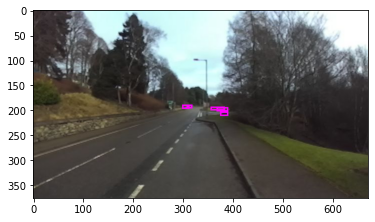

In [3]:
# Check an image from the train data loader
from torchvision.utils import draw_bounding_boxes

# Get an image with a label
for test_images, test_labels in val_data_loader:  
    sample_image = test_images[0]
    sample_label = test_labels[0]

boxes = sample_label['boxes']

# *255 needed when float32 to uint8 (draw_bounding_boxes works only uint8)
sample_image = sample_image*255
img = sample_image.to(torch.uint8)

# Draw an image with bounding boxes
result = draw_bounding_boxes(img, boxes, colors='#FF00FF', width=3)
print(len(boxes))
plt.imshow(result.permute(1, 2, 0))

In [4]:
model = get_model_instance_segmentation(2)
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [5]:
# Parameters
num_epochs = 3
lr=0.0001
optimizer = torch.optim.Adam(model.parameters(), lr)

train_epoch_loss_list = []
val_epoch_loss_list = []

print('----------------------train start--------------------------')

for i in range(num_epochs):
    epoch_loss = 0
    val_epoch_loss = 0
    model.train()
  
    # Valdiation data
    for imgs, targets in tqdm(val_data_loader, 'Iterating validation dataset'):
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        with torch.no_grad():
            loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        val_epoch_loss += losses.item()
    mean_val_epoch_loss = val_epoch_loss/len(val_data_loader)

    # Train data
    for imgs, targets in tqdm(data_loader, 'Iterating train dataset'):
        optimizer.zero_grad()
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        epoch_loss += losses.item()
        losses.backward()
        optimizer.step()
    mean_epoch_loss = epoch_loss/len(data_loader)
    
    train_epoch_loss_list.append(mean_epoch_loss)
    val_epoch_loss_list.append(mean_val_epoch_loss)
    
    # Save
    torch.save(model.state_dict(), './model/ex1_'+str(i+1)+'.pt')
    print(f'epoch : {i+1}, Train Loss : {mean_epoch_loss}, Val Loss : {mean_val_epoch_loss}')

----------------------train start--------------------------


Iterating train dataset: 100%|██████████████| 2966/2966 [20:24<00:00,  2.42it/s]


epoch : 1, Train Loss : 0.21207459497536185, Val Loss : 1.4817248493830364


Iterating train dataset: 100%|██████████████| 2966/2966 [20:30<00:00,  2.41it/s]


epoch : 2, Train Loss : 0.14181898677057825, Val Loss : 0.14451139293114346


Iterating train dataset: 100%|██████████████| 2966/2966 [20:28<00:00,  2.41it/s]


epoch : 3, Train Loss : 0.12315986994829779, Val Loss : 0.11613219649841389


In [6]:
# Parameters
num_epochs = 12
lr=0.00001

print('----------------------train start--------------------------')

for i in range(num_epochs):
    epoch_loss = 0
    val_epoch_loss = 0
    model.train()
  
    # Valdiation data
    for imgs, targets in tqdm(val_data_loader, 'Iterating validation dataset'):
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        with torch.no_grad():
            loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        val_epoch_loss += losses.item()
    mean_val_epoch_loss = val_epoch_loss/len(val_data_loader)

    # Train data
    for imgs, targets in tqdm(data_loader, 'Iterating train dataset'):
        optimizer.zero_grad()
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        epoch_loss += losses.item()
        losses.backward()
        optimizer.step()
    mean_epoch_loss = epoch_loss/len(data_loader)
    
    train_epoch_loss_list.append(mean_epoch_loss)
    val_epoch_loss_list.append(mean_val_epoch_loss)
    
    # Save
    torch.save(model.state_dict(), './model/ex1_'+str(i+4)+'.pt')
    print(f'epoch : {i+4}, Train Loss : {mean_epoch_loss}, Val Loss : {mean_val_epoch_loss}')

----------------------train start--------------------------


Iterating train dataset: 100%|██████████████| 2966/2966 [20:29<00:00,  2.41it/s]


epoch : 4, Train Loss : 0.10849290522771862, Val Loss : 0.12614519320428372


Iterating train dataset: 100%|██████████████| 2966/2966 [20:29<00:00,  2.41it/s]


epoch : 5, Train Loss : 0.09727243654428656, Val Loss : 0.11314257331937551


Iterating train dataset: 100%|██████████████| 2966/2966 [20:31<00:00,  2.41it/s]


epoch : 6, Train Loss : 0.08898276062032293, Val Loss : 0.11910396318385999


Iterating train dataset: 100%|██████████████| 2966/2966 [20:31<00:00,  2.41it/s]


epoch : 7, Train Loss : 0.08253277410617738, Val Loss : 0.1131050689642628


Iterating train dataset: 100%|██████████████| 2966/2966 [20:30<00:00,  2.41it/s]


epoch : 8, Train Loss : 0.07599211598583827, Val Loss : 0.10061895988198619


Iterating train dataset: 100%|██████████████| 2966/2966 [20:30<00:00,  2.41it/s]


epoch : 9, Train Loss : 0.07216416822379959, Val Loss : 0.10438089564690987


Iterating train dataset: 100%|██████████████| 2966/2966 [20:31<00:00,  2.41it/s]


epoch : 10, Train Loss : 0.06989265124438192, Val Loss : 0.09979838662408293


Iterating train dataset: 100%|██████████████| 2966/2966 [20:28<00:00,  2.41it/s]


epoch : 11, Train Loss : 0.06607914442299795, Val Loss : 0.1080623301534603


Iterating train dataset: 100%|██████████████| 2966/2966 [20:29<00:00,  2.41it/s]


epoch : 12, Train Loss : 0.06231166692575457, Val Loss : 0.13473101130872964


Iterating train dataset: 100%|██████████████| 2966/2966 [20:30<00:00,  2.41it/s]


epoch : 13, Train Loss : 0.061053384604659096, Val Loss : 0.11437077427872767


Iterating train dataset: 100%|██████████████| 2966/2966 [20:28<00:00,  2.41it/s]


epoch : 14, Train Loss : 0.05746599140054837, Val Loss : 0.1084864680590108


Iterating train dataset: 100%|██████████████| 2966/2966 [20:29<00:00,  2.41it/s]


epoch : 15, Train Loss : 0.055096229990716304, Val Loss : 0.11143239477090537


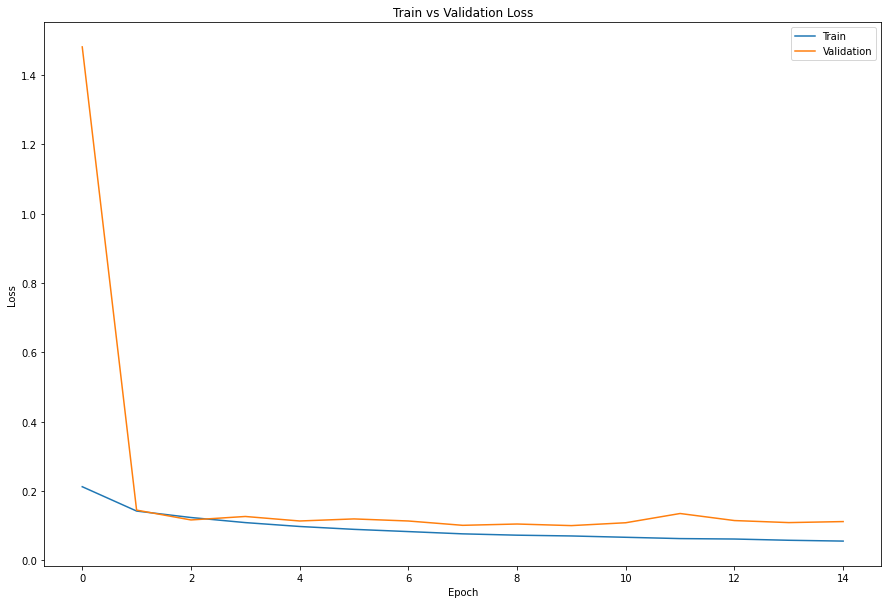

In [7]:
# Train result
y1 = train_epoch_loss_list
y2 = val_epoch_loss_list
x = list(range(0,len(y1)))

plt.figure(figsize=(15,10))
plt.plot(x, y1, label = "Train")
plt.plot(x, y2, label = "Validation")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()